## Bibliotecas

In [2]:
import pandas as pd
import numpy

import os

In [3]:
os.chdir('D:/jean_/OneDrive/Cursos/MBA Data Science & Machine Learning/Cientista de Dados/DESF/documents/')

diretorio_atual = os.getcwd()

In [4]:
df_dados_medicos = pd.read_excel('dados_medicos.xlsx')
df_dados_pacientes = pd.read_csv('dados_pacientes.csv', sep = ';', decimal = '.', encoding = 'ISO-8859-1')
df_estados_brasileiro = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding = 'ISO-8859-1')

## Tratamentos dos dados

### Dados médicos

In [5]:
df_dados_medicos.head(5)

,id_cliente,peso,colesterol
0,1,102.0,111
1,2,115.0,135
2,3,115.0,136
3,4,140.0,167
4,5,130.0,158


In [6]:
df_dados_medicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 12.9 KB


In [7]:
df_dados_medicos.isnull().sum()

id_cliente    0
peso          5
colesterol    0
dtype: int64

In [8]:
df_dados_medicos[df_dados_medicos['peso'].isnull()]

,id_cliente,peso,colesterol
63,64,NaN,211
101,102,NaN,230
146,147,NaN,171
195,196,NaN,143
215,216,NaN,180


In [9]:
peso_medio = round(df_dados_medicos['peso'].mean(), 2)
df_dados_medicos['peso'] = df_dados_medicos['peso'].fillna(peso_medio)

In [10]:
df_dados_medicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        547 non-null    float64
 2   colesterol  547 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 12.9 KB


### Dados pacientes

In [11]:
df_dados_pacientes.head(5)

,id_cliente,id_estado,idade,genero,estado Civil,renda,nivel_educacao
0,1,21,24,Feminino,Divorciado,8672.21,Superior
1,2,14,60,Feminino,Casado,2946.06,Superior
2,3,26,23,Feminino,Solteiro,5872.48,Médio
3,4,18,51,Masculino,Casado,7871.49,Superior
4,5,4,51,Outro,Viúvo,6033.31,Superior


In [12]:
df_dados_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_cliente      1000 non-null   int64  
 1   id_estado       1000 non-null   int64  
 2   idade           1000 non-null   int64  
 3   genero          1000 non-null   object 
 4   estado Civil    1000 non-null   object 
 5   renda           1000 non-null   float64
 6   nivel_educacao  1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [13]:
df_dados_pacientes['id_cliente'].nunique()

1000

In [14]:
df_dados_pacientes.isnull().sum()

id_cliente        0
id_estado         0
idade             0
genero            0
estado Civil      0
renda             0
nivel_educacao    0
dtype: int64

### Estados brasileiros

In [15]:
df_estados_brasileiro.head(5)

,id_estado,estado,sigla_estado,pais
0,1,Acre,AC,Brasil
1,2,Alagoas,AL,Brasil
2,3,Amapá,AP,Brasil
3,4,Amazonas,AM,Brasil
4,5,Bahia,BA,Brasil


In [16]:
df_estados_brasileiro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          27 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [17]:
df_estados_brasileiro.isnull().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

### Merge estados brasileiros e dados pacientes

In [18]:
print(df_dados_pacientes.columns)

print(df_estados_brasileiro.columns)

Index(['id_cliente', 'id_estado', 'idade', 'genero', 'estado Civil', 'renda',
       'nivel_educacao'],
      dtype='object')
Index(['id_estado', 'estado', 'sigla_estado', 'pais'], dtype='object')


In [19]:
df_pacientes_completo = pd.merge(df_dados_pacientes, df_estados_brasileiro, on = 'id_estado', how = 'inner')

### Merge dados médicos e dados pacientes

In [20]:
print(df_dados_medicos.columns)

print(df_pacientes_completo.columns)

Index(['id_cliente', 'peso', 'colesterol'], dtype='object')
Index(['id_cliente', 'id_estado', 'idade', 'genero', 'estado Civil', 'renda',
       'nivel_educacao', 'estado', 'sigla_estado', 'pais'],
      dtype='object')


In [34]:
print(df_dados_medicos.shape)

print(df_pacientes_completo.shape)

(547, 3)
(1000, 10)


In [37]:
df_dados_medicos_completo = pd.merge(df_dados_medicos, df_pacientes_completo, on = 'id_cliente')
df_dados_medicos_completo.head(5)

,id_cliente,peso,colesterol,id_estado,idade,genero,estado Civil,renda,nivel_educacao,estado,sigla_estado,pais
0,1,102.0,111,21,24,Feminino,Divorciado,8672.21,Superior,Rio Grande do Sul,RS,Brasil
1,2,115.0,135,14,60,Feminino,Casado,2946.06,Superior,Pará,PA,Brasil
2,3,115.0,136,26,23,Feminino,Solteiro,5872.48,Médio,Sergipe,SE,Brasil
3,4,140.0,167,18,51,Masculino,Casado,7871.49,Superior,Piauí,PI,Brasil
4,5,130.0,158,4,51,Outro,Viúvo,6033.31,Superior,Amazonas,AM,Brasil


## Questão 2 
Qual é a idade média das pessoas que residem no estado de Minas Gerais?

In [22]:
df_dados_medicos_completo.head(5)

,id_cliente,id_estado,idade,genero,estado Civil,renda,nivel_educacao,estado,sigla_estado,pais
0,1,21,24,Feminino,Divorciado,8672.21,Superior,Rio Grande do Sul,RS,Brasil
1,7,21,53,Outro,Viúvo,9074.09,Superior,Rio Grande do Sul,RS,Brasil
2,37,21,46,Outro,Divorciado,6599.17,Superior,Rio Grande do Sul,RS,Brasil
3,44,21,26,Outro,Divorciado,8440.45,Fundamental,Rio Grande do Sul,RS,Brasil
4,70,21,45,Feminino,Viúvo,6768.28,Fundamental,Rio Grande do Sul,RS,Brasil


In [23]:
df_dados_medicos_completo['estado'].unique()

array(['Rio Grande do Sul', 'Pará', 'Sergipe', 'Piauí', 'Amazonas',
       'Tocantins', 'Mato Grosso do Sul', 'Ceará', 'Alagoas',
       'Santa Catarina', 'Espírito Santo', 'Distrito Federal', 'Paraíba',
       'Bahia', 'Acre', 'Goiás', 'Pernambuco', 'São Paulo', 'Maranhão',
       'Rio de Janeiro', 'Minas Gerais', 'Roraima', 'Amapá',
       'Mato Grosso', 'Rondônia', 'Rio Grande do Norte', 'Paraná'],
      dtype=object)

In [38]:
df_dados_medicos_completo[df_dados_medicos_completo['estado'] == 'Minas Gerais']['idade'].mean()

42.76923076923077

## Questão 4
Crie um gráfico de caixa (boxplot) para representar a distribuição da renda por gênero das pessoas que residem no estado de Minas Gerais e, em seguida, responda:  
Qual é o gênero que possui maior mediana da renda representado no gráfico de caixa?

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

plt.style.use("cyberpunk")

In [39]:
df_pacientes_mineiros = df_dados_medicos_completo[df_dados_medicos_completo['estado'] == 'Minas Gerais']
df_pacientes_mineiros.head(5)

,id_cliente,peso,colesterol,id_estado,idade,genero,estado Civil,renda,nivel_educacao,estado,sigla_estado,pais
35,36,106.0,122,13,65,Feminino,Solteiro,8339.84,Superior,Minas Gerais,MG,Brasil
73,74,156.0,191,13,44,Masculino,Viúvo,9336.11,Superior,Minas Gerais,MG,Brasil
84,85,102.0,111,13,49,Masculino,Viúvo,1610.89,Fundamental,Minas Gerais,MG,Brasil
98,99,97.0,106,13,18,Outro,Divorciado,9881.47,Médio,Minas Gerais,MG,Brasil
125,126,107.0,117,13,65,Masculino,Solteiro,1215.07,Médio,Minas Gerais,MG,Brasil


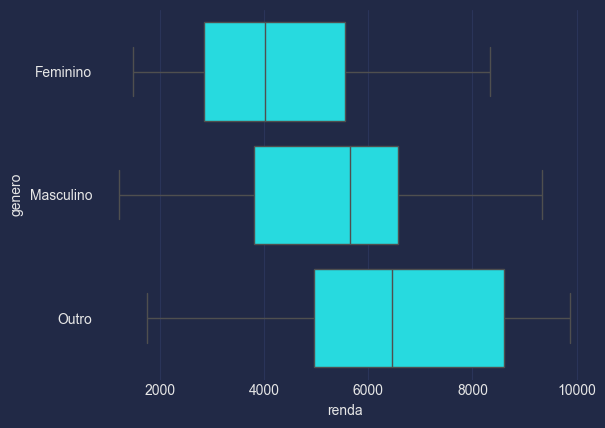

In [40]:
fig, ax = plt.subplots()
ax = sns.boxplot(data = df_pacientes_mineiros, x = 'renda', y ='genero')

plt.show()

## Questão 6 
Crie um gráfico de caixa (boxplot) para representar as idades das pessoas que possuem níveis de educação superior, categorizadas por seu estado civil. Em seguida, escolha o gráfico que melhor representa essa distribuição.

In [41]:
df_pacientes_graduados = df_dados_medicos_completo[df_dados_medicos_completo['nivel_educacao'] == 'Superior']
df_pacientes_graduados.head(5)

,id_cliente,peso,colesterol,id_estado,idade,genero,estado Civil,renda,nivel_educacao,estado,sigla_estado,pais
0,1,102.0,111,21,24,Feminino,Divorciado,8672.21,Superior,Rio Grande do Sul,RS,Brasil
1,2,115.0,135,14,60,Feminino,Casado,2946.06,Superior,Pará,PA,Brasil
3,4,140.0,167,18,51,Masculino,Casado,7871.49,Superior,Piauí,PI,Brasil
4,5,130.0,158,4,51,Outro,Viúvo,6033.31,Superior,Amazonas,AM,Brasil
6,7,114.0,131,21,53,Outro,Viúvo,9074.09,Superior,Rio Grande do Sul,RS,Brasil


<Axes: xlabel='idade', ylabel='estado Civil'>

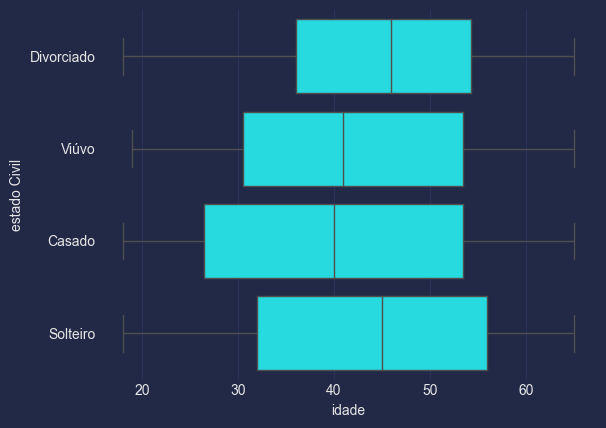

In [43]:
ordem = ['Divorciado', 'Viúvo', 'Casado', 'Solteiro']
sns.boxplot(x = df_pacientes_graduados['idade'], y = df_pacientes_graduados['estado Civil'], order = ordem)

## Questão 7
Calcule estatísticas descritivas para a variável "colesterol" agrupadas por nível de educação. Em seguida, com base nas estatísticas calculadas, escolha a alternativa CORRETA.

In [57]:
df_dados_medicos_completo.groupby(['nivel_educacao'])['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nivel_educacao,,,,,,,,
Fundamental,179.0,173.418994,37.652281,102.0,142.5,172.0,208.0,235.0
Médio,163.0,167.245399,40.243716,102.0,131.0,167.0,206.0,232.0
Superior,205.0,170.360976,39.530039,102.0,136.0,169.0,208.0,235.0


## Questão 8
Crie um histograma com 20 barras representando o peso das pessoas. Em seguida, com base no histograma gerado, escolha a alternativa que melhor descreve a distribuição dos pesos.

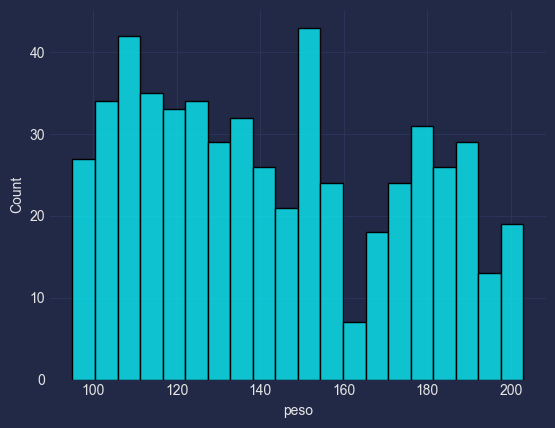

In [61]:
fig, ax = plt.subplots()
ax = sns.histplot(data = df_dados_medicos_completo, x = 'peso', bins = 20)

plt.show()

## Questão 9
Qual é o estado cujo residente possui a maior renda, e qual é o estado civil dessa pessoa?

In [64]:
df_dados_medicos_completo.sort_values(by = 'renda', ascending = False).head(1)

,id_cliente,peso,colesterol,id_estado,idade,genero,estado Civil,renda,nivel_educacao,estado,sigla_estado,pais
216,217,203.0,235,12,31,Outro,Casado,9989.72,Superior,Mato Grosso do Sul,MS,Brasil


## Questão 10
Crie um gráfico de dispersão que represente as relações entre as variáveis peso (eixo x) e colesterol (eixo y) e selecione o gráfico que melhor ilustra essa relação.

<Figure size 1000x1000 with 0 Axes>

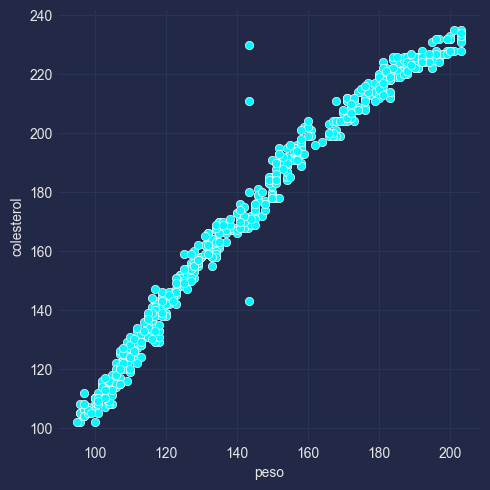

In [83]:
plt.figure(figsize = (10, 10))
sns.relplot(data = df_dados_medicos_completo, x = 'peso', y = 'colesterol');

## Questão 11
Ao aplicar um modelo de regressão linear usando machine learning, responda à seguinte pergunta: Qual é o valor estimado de colesterol para uma pessoa que possui um peso de 128 quilos, com base no modelo?

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [91]:
X = np.array(df_dados_medicos_completo['peso'].values.reshape(-1, 1))
y = np.array(df_dados_medicos_completo['colesterol'].values.reshape(-1, 1))

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = .2)

In [112]:
regressao_linear = LinearRegression()
modelo_reg_linear = regressao_linear.fit(X_treino, y_treino)
modelo_reg_linear.predict([[128]])

array([[151.27558018]])

In [108]:
# modelo_reg_linear.score(X_treino, y_treino)

## Questão 12
Qual é o valor do coeficiente angular da reta?

In [113]:
coeficiente_angular = modelo_reg_linear.coef_
print(f'O coeficiente angular do modelo criado é {coeficiente_angular}')

O coeficiente angular do modelo criado é [[1.25652359]]


## Questão 13
Qual foi o coeficiente de determinação R² do modelo?

In [119]:
from sklearn.metrics import r2_score

y_previsto = modelo_reg_linear.predict(X_teste)

r2 = r2_score(y_teste, y_previsto)
print('O valor do R quadrado é:', round(r2, 3))

O valor do R quadrado é: 0.978


## Questão 14
Qual o valor do mean absolute error do modelo criado?

In [125]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_teste, y_previsto)
print('O valor do mean absolute error é:', round(mae, 3))

O valor do mean absolute error é: 4.799


## Questão 15
Qual o valor do mean squared error do modelo criado?

In [126]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_teste, y_previsto)
print('O valor do mean squared error é:', round(mse, 3))

O valor do mean squared error é: 35.633
